In [21]:
## test file to visualize audio files

#import the libraries

import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import os

In [22]:
path = os.getcwd()

In [23]:
dir_list = os.listdir(path)

In [25]:
print(path)

C:\Users\thuyn\desktop\audio_nft


In [38]:
file_path = ("https://www2.cs.uic.edu/~i101/SoundFiles/BabyElephantWalk60.wav")

In [39]:
def generate_spect(file):
    y, sr = librosa.load(file, offset =0.0, duration=5.0)


    y, sr = librosa.load(file, duration=5)
    fig, ax = plt.subplots(nrows=3, sharex=True)
    librosa.display.waveshow(y, sr=sr, ax=ax[0])
    ax[0].set(title='ok boomer waveplot, mono')
    ax[0].label_outer()

    name = "OK Boomer"
    S = np.abs(librosa.stft(y))
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    fig, ax = plt.subplots(nrows=2, sharex=True)
    img1 = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time', ax=ax[0])
    spect_1 = fig.colorbar(img1, ax=[ax[0]])
    ax[0].label_outer()
    img2 = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
    spect_2 = fig.colorbar( img2, ax=[ax[1]],label = name )

    return spect_1, spect_2


In [40]:
generate_spect(file_path)

OSError: [Errno 22] Invalid argument: 'https://www2.cs.uic.edu/~i101/SoundFiles/BabyElephantWalk60.wav'

In [12]:
#load an audio file

y, sr = librosa.load(file_path, offset =0.0, duration=5.0)
y


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       9.57545853e-05, 1.17004594e-04, 0.00000000e+00], dtype=float32)

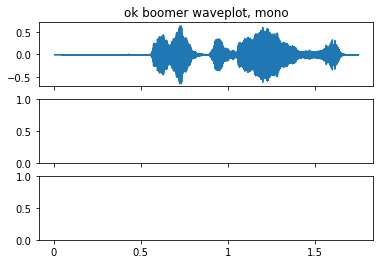

In [13]:
y, sr = librosa.load(file_path, duration=5)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='ok boomer waveplot, mono')
ax[0].label_outer()

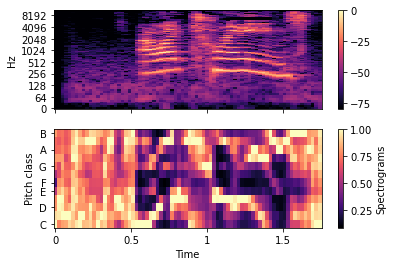

In [14]:

name = "Spectrograms"
S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
spec1 = fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
spec2 = fig.colorbar( img, ax=[ax[1]],label = name )

In [5]:
import ffmpeg
from pydub import AudioSegment
from pydub.playback import play

C:\Users\nmend\anaconda3\envs\dev\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [6]:
sound = AudioSegment.from_wav('ok_boomer.wav')
play(sound)

C:\Users\nmend\anaconda3\envs\dev\lib\site-packages\pydub\utils.py:184: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\nmend\\AppData\\Local\\Temp\\tmpieaz_0hq.wav'

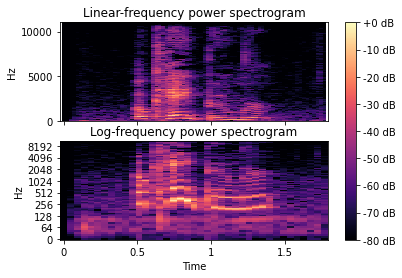

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")